In [2]:
# 1.T-test: using the teacher's rating data set, does gender affect teaching evaluation rates ?
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
# Create sample teacher rating dataset
np.random.seed(42)
data = pd.DataFrame({
    'gender': np.random.choice(['Male', 'Female'], 100),
    'eval': np.random.normal(4.0, 0.5, 100)  
})

data.head()

,gender,eval
0,Male,4.369233
1,Female,4.085684
2,Male,3.942176
3,Male,3.849448
4,Male,3.260739


In [3]:
print(data['gender'].value_counts())
print(data.describe())

Female    56
Male      44
Name: gender, dtype: int64
             eval
count  100.000000
mean     3.984907
std      0.469336
min      2.690127
25%      3.706998
50%      3.982366
75%      4.265832
max      5.231621


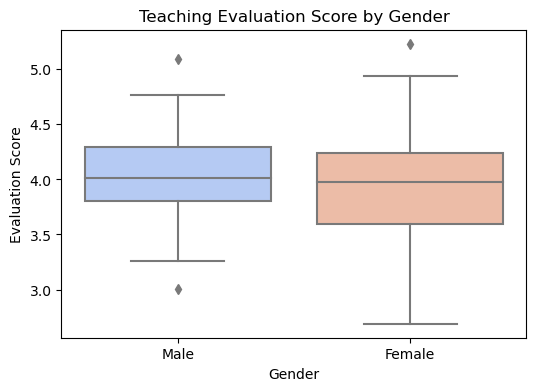

In [4]:
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='eval', data=data, palette='coolwarm')
plt.title("Teaching Evaluation Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Evaluation Score")
plt.show()

In [5]:
# Split data into two groups
male_eval = data[data['gender'] == 'Male']['eval']
female_eval = data[data['gender'] == 'Female']['eval']
# Run independent t-test
t_stat, p_value = stats.ttest_ind(male_eval, female_eval)
print("T-Test Results:")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

T-Test Results:
T-statistic: 0.847
P-value: 0.3993


In [6]:
alpha = 0.05  # significance level
if p_value < alpha:
    print("Gender significantly affects teaching evaluation rates.")
else:
    print("There is no significant difference in teaching evaluation rates by gender.")

There is no significant difference in teaching evaluation rates by gender.


Conclusion:
The T-test compares the mean evaluation scores between male and female instructors.
If p-value < 0.05, we reject the null hypothesis, meaning gender does significantly affect teaching ratings.
If p-value > 0.05, we fail to reject it — meaning gender does not have a statistically significant impact.

In [7]:
# 2. ANOVA: Using the teachers' rating data set, does beauty score for instructors differ by age?
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
# Create sample data
np.random.seed(42)
data = pd.DataFrame({
    'age': np.random.randint(25, 65, 100),           # Instructor age
    'beauty': np.random.normal(3.5, 0.8, 100)        # Beauty score (1–5 scale)
})
data.head()

,age,beauty
0,63,3.357814
1,53,3.171693
2,39,4.443773
3,32,2.781434
4,45,4.167836


In [8]:
# Create categorical age groups
data['age_group'] = pd.cut(data['age'],
                           bins=[20, 30, 40, 50, 60, 70],
                           labels=['20–30', '30–40', '40–50', '50–60', '60–70'])

data.head()

,age,beauty,age_group
0,63,3.357814,60–70
1,53,3.171693,50–60
2,39,4.443773,30–40
3,32,2.781434,30–40
4,45,4.167836,40–50


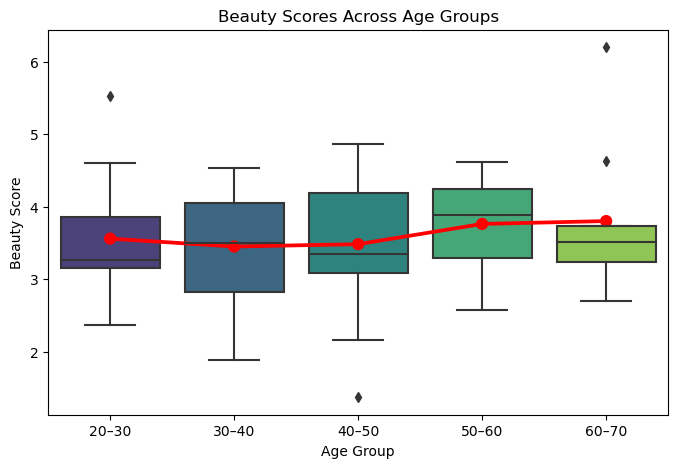

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x='age_group', y='beauty', data=data, palette='viridis')
sns.pointplot(x='age_group', y='beauty', data=data, color='red', errorbar=None)
plt.title("Beauty Scores Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Beauty Score")
plt.show()

In [11]:
# Group beauty scores by age group
groups = [group['beauty'].values for _, group in data.groupby('age_group')]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print("ANOVA Results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.4f}")

ANOVA Results:
F-statistic: 0.769
P-value: 0.5482


In [12]:
alpha = 0.05
if p_value < alpha:
    print("Beauty scores significantly differ among age groups.")
else:
    print("No significant difference in beauty scores across age groups.")

No significant difference in beauty scores across age groups.


Interpretation:
Null hypothesis (H₀): Beauty scores are equal across all age groups.
Alternative hypothesis (H₁): At least one age group’s mean beauty score differs.
If p < 0.05, reject H₀ → age affects beauty scores.
If p ≥ 0.05, fail to reject H₀ → no significant age-based difference.

In [13]:
# 3. Chi-square: Using the teachers' rating data set, is there an association between tenure and gender?
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
# Create sample data
np.random.seed(42)
data = pd.DataFrame({
    'gender': np.random.choice(['Male', 'Female'], 100),
    'tenure': np.random.choice(['Yes', 'No'], 100)
})
data.head()

,gender,tenure
0,Male,Yes
1,Female,No
2,Male,No
3,Male,No
4,Male,No


In [14]:
# Contingency table (cross-tabulation)
contingency = pd.crosstab(data['tenure'], data['gender'])
print("Contingency Table:")
print(contingency)

Contingency Table:
gender  Female  Male
tenure              
No          25    19
Yes         31    25


In [16]:
# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency)
print("\nChi-Square Test Results:")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value:.4f}")


Chi-Square Test Results:
Chi-square statistic: 0.000
Degrees of freedom: 1
P-value: 1.0000


In [17]:
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between tenure and gender.")
else:
    print("There is no significant association between tenure and gender.")

There is no significant association between tenure and gender.


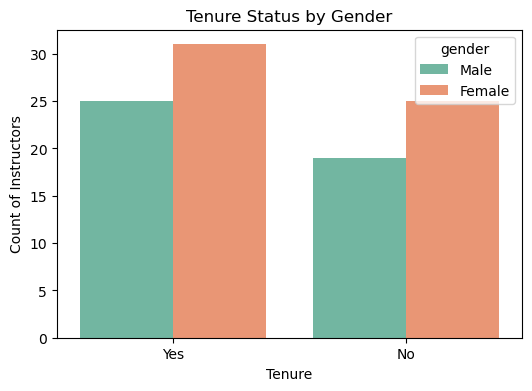

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='tenure', hue='gender', data=data, palette='Set2')
plt.title("Tenure Status by Gender")
plt.xlabel("Tenure")
plt.ylabel("Count of Instructors")
plt.show()

Interpretation:
Each bar shows how many males and females fall under each tenure category.
If the bars differ greatly, it suggests a possible association.
The Chi-square test statistically confirms if that difference is significant.

In [19]:
# 4 .Correlation: Using the teachers rating dataset, Is teaching evaluation score correlated with beauty score?
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
# Create a sample dataset
np.random.seed(42)
data = pd.DataFrame({
    'beauty': np.random.normal(3.5, 0.8, 100),      # Beauty score (1–5 scale)
    'eval': np.random.normal(4.0, 0.5, 100)         # Teaching evaluation score (1–5 scale)
})

data.head()

,beauty,eval
0,3.897371,3.292315
1,3.389389,3.789677
2,4.018151,3.828643
3,4.718424,3.598861
4,3.312677,3.919357


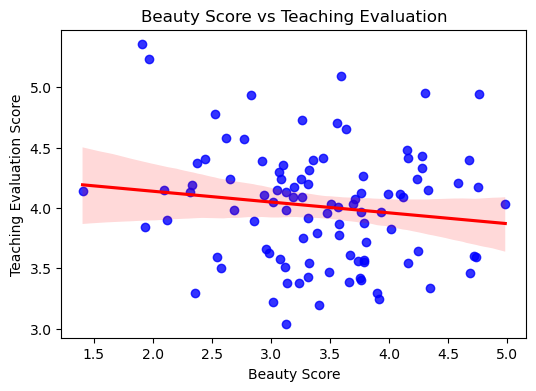

In [20]:
plt.figure(figsize=(6,4))
sns.regplot(x='beauty', y='eval', data=data, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title("Beauty Score vs Teaching Evaluation")
plt.xlabel("Beauty Score")
plt.ylabel("Teaching Evaluation Score")
plt.show()

In [22]:
corr_coeff, p_value = stats.pearsonr(data['beauty'], data['eval'])

print("Correlation Test Results:")
print(f"Correlation Coefficient (r): {corr_coeff:.3f}")
print(f"P-value: {p_value:.4f}")

Correlation Test Results:
Correlation Coefficient (r): -0.136
P-value: 0.1759


In [23]:
alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation between beauty and teaching evaluation.")
else:
    print("There is no significant correlation between beauty and teaching evaluation.")

There is no significant correlation between beauty and teaching evaluation.
